In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Taxas de Rendimento Escolar (2013 a 2023) - INEP
# Estes dados representam a primeira parte do trabalho final da disciplina de Probabilidade e Estatística do Bacharelado Interdisciplinar em Ciência e Tecnologia da Universidade Federal de São Paulo (UNIFESP).

# O conjunto de dados inclui informações sobre as taxas de rendimento escolar (aprovação, reprovação e abandono) por Unidade Federativa/Região, Administração (Estadual, Federal, Municipal, Privada, Pública), Localização (Urbana, Rural), Etapa e Nível de Ensino.

# Os dados podem ser baixados no site do INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira) através do seguinte link: Taxas de Rendimento Escolar

# Expressamos nossa gratidão aos membros Andrezza, Anthony, Pedro Tamashiro, Gustavo e Diogo do grupo "Cenário Pós-Pandêmico: Taxa de Aprovação dos Alunos do Ensino Médio Pré e Pós-Crise Global" pela recomendação deste conjunto de dados.

# Na próxima fase, pretendemos correlacionar a taxa de abandono escolar com a renda média nas Unidades Geográficas do Brasil. O conjunto de dados para essa análise está disponível em: Taxa de Abandono Escolar por Renda Média (Brasil 2013-2023).

In [2]:
dataset = pd.read_csv("taxas_de_rendimento_escolar_2013_2023_INEP.csv")
print(dataset.shape)
dataset.head()

(6440, 59)


,Ano,Unidade_Geografica,Regiao,Localizacao,Dependencia_Administrativa,Taxa_Aprovacao_Total_EF,Taxa_Aprovacao_Anos_Iniciais_EF,Taxa_Aprovacao_Anos_Finais_EF,Taxa_Aprovacao_1_Ano_EF,Taxa_Aprovacao_2_Ano_EF,...,Taxa_Abandono_6_Ano_EF,Taxa_Abandono_7_Ano_EF,Taxa_Abandono_8_Ano_EF,Taxa_Abandono_9_Ano_EF,Taxa_Abandono_Total_EM,Taxa_Abandono_1_Ano_EM,Taxa_Abandono_2_Ano_EM,Taxa_Abandono_3_Ano_EM,Taxa_Abandono_4_Ano_EM,Taxa_Abandono_Nao_Seriado_EM
0,2013,Norte,Brasil,Total,Total,85.7,88.6,81.7,96.5,93.2,...,6.4,5.8,5.6,5.7,13.4,16.1,12.7,10.2,3.4,17.3
1,2013,Norte,Brasil,Total,Pública,84.8,87.8,80.6,96.4,92.7,...,6.8,6.3,6.1,6.2,14.4,17.2,13.7,11.0,3.4,17.6
2,2013,Norte,Brasil,Total,Privada,96.8,98.1,94.9,98.1,98.3,...,0.3,0.4,0.3,0.3,0.8,0.9,0.7,0.7,4.9,0.0
3,2013,Norte,Brasil,Total,Municipal,85.1,87.0,80.8,96.2,92.1,...,7.9,7.0,6.7,6.4,1.8,1.6,3.1,0.0,NaN,NaN
4,2013,Norte,Brasil,Total,Federal,89.3,95.3,86.1,99.3,98.4,...,0.0,0.0,0.2,0.0,3.3,3.2,4.7,1.5,4.0,2.3


In [24]:
data_edu_ne = dataset[(dataset['Unidade_Geografica'] == 'Nordeste') & (dataset['Taxa_Aprovacao_Total_EF'] >= 80.0) & (dataset['Dependencia_Administrativa'] == 'Municipal')]
print(data_edu_ne.shape)
data_edu_ne.head()

(33, 59)


,Ano,Unidade_Geografica,Regiao,Localizacao,Dependencia_Administrativa,Taxa_Aprovacao_Total_EF,Taxa_Aprovacao_Anos_Iniciais_EF,Taxa_Aprovacao_Anos_Finais_EF,Taxa_Aprovacao_1_Ano_EF,Taxa_Aprovacao_2_Ano_EF,...,Taxa_Abandono_6_Ano_EF,Taxa_Abandono_7_Ano_EF,Taxa_Abandono_8_Ano_EF,Taxa_Abandono_9_Ano_EF,Taxa_Abandono_Total_EM,Taxa_Abandono_1_Ano_EM,Taxa_Abandono_2_Ano_EM,Taxa_Abandono_3_Ano_EM,Taxa_Abandono_4_Ano_EM,Taxa_Abandono_Nao_Seriado_EM
21,2013,Nordeste,Brasil,Total,Municipal,84.3,88.1,78.4,96.7,94.9,...,7.1,6.4,6.1,5.8,15.5,23.7,13.8,8.8,7.2,NaN
27,2013,Nordeste,Brasil,Rural,Municipal,85.8,88.4,80.9,97.0,95.0,...,6.7,6.1,6.3,5.5,12.2,16.5,11.4,6.7,13.1,NaN
33,2013,Nordeste,Brasil,Urbana,Municipal,83.4,87.9,77.2,96.5,94.8,...,7.4,6.7,6.0,5.9,17.9,29.8,15.6,10.3,5.7,NaN
622,2014,Nordeste,Brasil,Total,Municipal,84.1,87.9,78.4,96.9,95.6,...,7.0,6.4,6.0,5.8,15.7,21.5,15.7,10.0,11.3,20.8
628,2014,Nordeste,Brasil,Rural,Municipal,85.4,88.1,80.5,97.2,95.8,...,6.7,5.9,6.0,5.7,14.3,18.7,13.7,8.1,16.0,22.2


In [25]:
nono_ano_EF = data_edu_ne['Taxa_Aprovacao_9_Ano_EF']
media = np.mean(nono_ano_EF)
mediana = np.median(nono_ano_EF)
quartis = np.quantile(nono_ano_EF, [0, 0.25, 0.5, 0.75, 1])
desvio_padrao = np.std(nono_ano_EF, ddof=1)
variancia = np.var(nono_ano_EF, ddof=1)
print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 90.95
Mediana: 90.10
Quartis: [85.1 88.4 90.1 94.7 98.1]
Desvio-Padrão: 3.76
Variância: 14.13


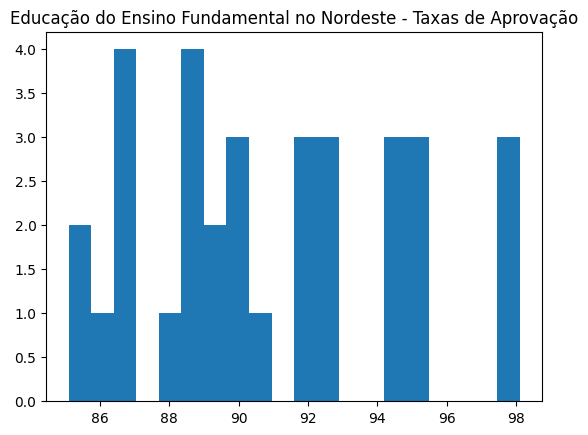

In [26]:
# Teste de Normalidade
# Histograma

plt.hist(nono_ano_EF, bins=20)
plt.title("Educação do Ensino Fundamental no Nordeste - Taxas de Aprovação")
plt.show()


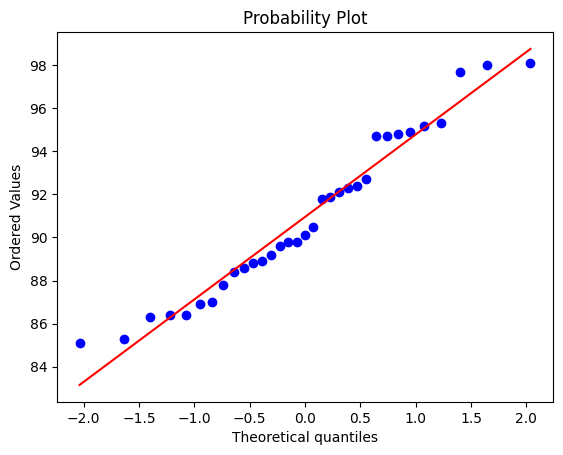

In [27]:
# Teste de Normalidade
# Geração Q-Q Plot

fig, ax = plt.subplots()
stats.probplot(nono_ano_EF, fit=True,   plot=ax)
plt.show()

In [28]:
# Teste de Normalidade
# Execução do Teste de Shapiro-Wilk
# p > 0.05 para Hipótese Nula

stats.shapiro(nono_ano_EF)

ShapiroResult(statistic=np.float64(0.9523311910094154), pvalue=np.float64(0.15556800202607218))

In [ ]:
# Pelo Teste de Shapiro-Wilk, e no Gráfico do Q-Q Plot, não há como rejeitar a Hipótese Nula, ou seja, os dados estão distribuídos normalmente. Conclusão, a média de aprovação dos alunos do 9º do ensino fundamental da rede municipal é de 90.95%, ou seja, de 10 alunos da rede pública municipal do Nordeste Brasileiro, em média 9 alunos são aprovados, segundo dados do INEP.

In [41]:
# Qual a probabilidade de a taxa de aprovação ser menor que 80% dos alunos do 9º do ensino fundamental da rede municipal do Nordeste Brasileiro.

taxa_aprovacao = 80.0
prob = stats.norm.cdf(taxa_aprovacao, media, desvio_padrao)
print(f"Probabilidade: {prob * 100:.2f}%")


Probabilidade: 0.18%


In [42]:
# Esse alto índice de aprovação tem relação com as diversas políticas públicas adotadas, principalmente pelo Governo Federal, de evitar a evasão escolar, como por exemplo, o Bolsa Família. No entanto, a defasagem de aprendizagem é enorme. Muitos alunos saem do Ensino Fundamental mal sabendo ler e escrever e com déficit enorme em matemática. Daí se tira outra conclusão de que os altos índices de aprovação no Ensino Fundamental não tem correlação com a aprendizagem dos alunos, o que indica uma desqualificação dos quadros técnicos dos professores dessas redes de Ensino. Estima-se que 30% da população brasileira é analfabeta funcional, ou seja, leem mas não entendem do que leram.